In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  

import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as stats
import math 

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
#convert column name ['date'] from object to datetime 
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x=='?' else x)

#Convert sqft_basement to a number
df['sqft_basement'] = df['sqft_basement'].astype(float)

#might be cool to create a function that takes any column date and converts it 

df['date'] = pd.to_datetime(df['date'])

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [5]:
#replacing all ? with 0's - major assumption that requires data enrichment to correct
#

df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x==
                                             '?' else x)

df['sqft_basement'] = df['sqft_basement'].astype(float)

df['sqft_basement'].describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [6]:
# Identify null values 

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#Repeat the same process for view which indicates how many times a house has been viewed

#We replaced all views with a median value, its safe to assume houses on the market in these areas are quite popular and viewed 
median = df['view'].median()
df['view'] = df['view'].fillna(value=median)#Waterfront 0 = No waterfront, 1=Waterfront 

#Making all nulls 0 indicating no waterfront 

df['waterfront'].isna().sum()

df['waterfront'] = df['waterfront'].fillna(0)


df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [8]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#dropped all duplicates for id 
#inplace = True changes the dataframe permanently

df.drop_duplicates(subset=['id'], inplace=True)

In [10]:
#drop id column
df.drop(['id'], axis=1, inplace=True)

In [11]:
df.shape

(21420, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA4ADBCC8>,
      dtype=object)

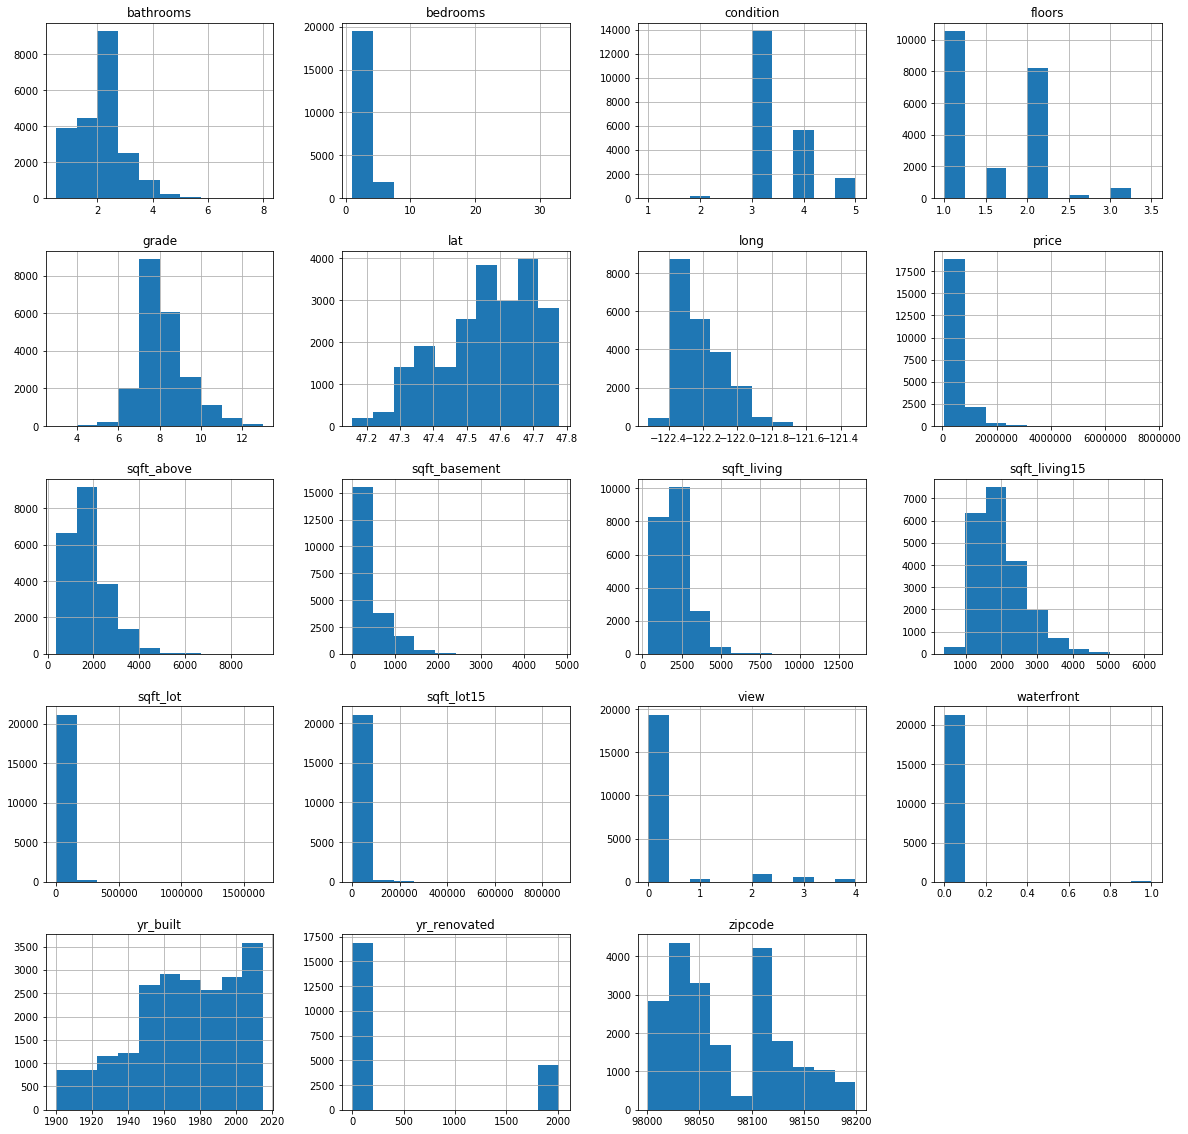

In [12]:
df.hist(figsize=(20,20))

In [13]:
#sqft_living 

indexNames = df[df['sqft_living'] >= 5000 ].index
df.drop(indexNames , inplace=True)

# sqft_above 

indexNames = df[df['sqft_above'] >= 4500 ].index
df.drop(indexNames , inplace=True)

#sqft_basement 

indexNames = df[df['sqft_basement'] >= 2000 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_lot outliers

indexNames = df[df['sqft_lot'] >= 100000 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_living15 outliers

indexNames = df[df['sqft_living15'] >= 4500 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_lot15 outliers

indexNames = df[df['sqft_lot15'] >= 100000 ].index
df.drop(indexNames , inplace=True)


# dropping grade outliers
indexNames = df[df['grade'] == 3 ].index
df.drop(indexNames , inplace=True)

indexNames = df[df['grade'] == 13 ].index
df.drop(indexNames , inplace=True)

# dropping bedroom outliers over 8 rooms
indexNames = df[df['bedrooms'] >= 8 ].index
df.drop(indexNames , inplace=True)

#drop houses over a million
indexNames = df[df['price'] >= 1000000].index
df.drop(indexNames, inplace=True)

In [14]:
corr = df.corr()

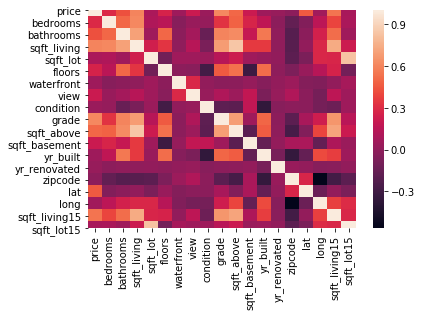

In [15]:
sns.heatmap(corr)

In [16]:
from sklearn import preprocessing

In [17]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [52]:
scaled_df = df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors','sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15']]

In [53]:
from sklearn.preprocessing import MinMaxScaler

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.


In [54]:
scaler = MinMaxScaler()

In [55]:
print(scaler.fit_transform(scaled_df))

[[0.15607392 0.33333333 0.0952381  ... 0.         0.2180917  0.0506664 ]
 [0.49891594 0.33333333 0.33333333 ... 0.20100503 0.30483271 0.07082552]
 [0.11062919 0.16666667 0.0952381  ... 0.         0.56009913 0.07511276]
 ...
 [0.3515199  0.16666667 0.04761905 ... 0.         0.13878563 0.01374348]
 [0.34924116 0.33333333 0.38095238 ... 0.         0.2354399  0.00644605]
 [0.26789617 0.16666667 0.04761905 ... 0.         0.13878563 0.00715553]]


In [56]:
scaled_df = scaler.transform(scaled_df)

In [57]:
scaled_df = pd.DataFrame(scaled_df, columns = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors','sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15'])

In [58]:
scaled_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,0.156074,0.333333,0.095238,0.177243,0.051612,0.0,0.197080,0.000000,0.218092,0.050666
1,0.498916,0.333333,0.333333,0.481400,0.067628,0.4,0.437956,0.201005,0.304833,0.070826
2,0.110629,0.166667,0.095238,0.087527,0.095376,0.0,0.097324,0.000000,0.560099,0.075113
3,0.570500,0.500000,0.476190,0.347921,0.045072,0.0,0.165450,0.457286,0.223048,0.044078
4,0.468547,0.333333,0.285714,0.286652,0.076059,0.0,0.318735,0.000000,0.332094,0.069447


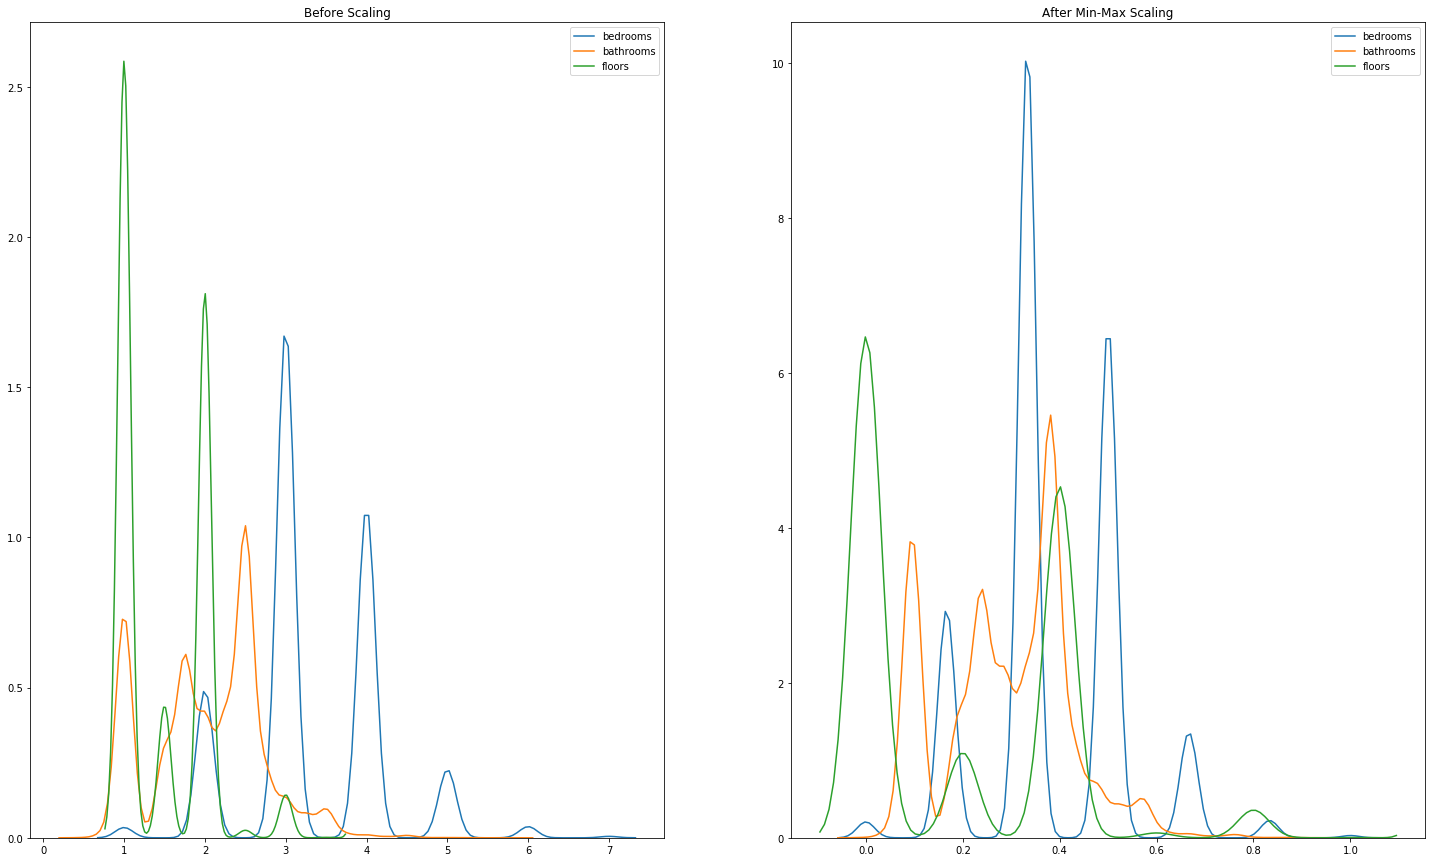

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 15))
ax1.set_title('Before Scaling')
sns.kdeplot(df['bedrooms'], ax=ax1)
sns.kdeplot(df['bathrooms'], ax=ax1)
sns.kdeplot(df['floors'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['bedrooms'], ax=ax2)
sns.kdeplot(scaled_df['bathrooms'], ax=ax2)
sns.kdeplot(scaled_df['floors'], ax=ax2)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA8500108>,
      dtype=object)

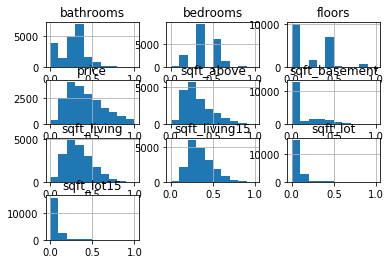

In [103]:
scaled_df.hist()

In [62]:
# OLS Regression

#It didnt seem to work!

import statsmodels.api as sm
import statsmodels.formula.api as smf

col_names = df.describe().columns #What does this?

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value ']] #creating an array of results we care about

for idx, val in enumerate(col_names):
    print('price~' + val)
    f = 'price~' + val
    model = smf.ols(formula=f, data=scaled_df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append({val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]})

    print(results[idx+1])
    print(model.summary())

price~price
{0.0, 1.0, 1.0000000000000004, -3.0357660829594124e-16, 'price'}
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.075e+34
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:10:51   Log-Likelihood:             6.7970e+05
No. Observations:               19394   AIC:                        -1.359e+06
Df Residuals:                   19392   BIC:                        -1.359e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

PatsyError: Error evaluating factor: NameError: name 'waterfront' is not defined
    price~waterfront
          ^^^^^^^^^^

# Numerical Only Regresision

In [63]:
# Numerical Only Regression

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000
mean,464344.259616,3.314169,2.030435,1934.837011,9811.660204,1.471821,0.002372,0.154171,3.407703,7.493658,1674.932608,254.289058,1970.633650,410.647623,98079.377179,47.558005,-122.217229,1897.099722,9213.057286
std,194611.680215,0.865549,0.692493,728.711322,10606.555760,0.538104,0.048645,0.602896,0.645053,0.995263,692.668128,393.426251,29.213787,801.308969,53.519492,0.140594,0.139285,594.008619,9261.596249
min,78000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,311000.000000,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1951.000000,0.000000,98033.000000,47.462900,-122.331000,1460.000000,5000.000000
50%,430000.000000,3.000000,2.000000,1830.000000,7390.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1974.000000,0.000000,98072.000000,47.567250,-122.240000,1780.000000,7475.000000
75%,589000.000000,4.000000,2.500000,2390.000000,9990.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2050.000000,500.000000,1996.000000,0.000000,98118.000000,47.680800,-122.129000,2240.000000,9638.750000
max,999999.000000,7.000000,5.750000,4940.000000,99916.000000,3.500000,1.000000,4.000000,5.000000,11.000000,4480.000000,1990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4495.000000,99316.000000


In [67]:
outcome  = 'price'

x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors','sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15']

In [68]:
from statsmodels.formula.api import ols

In [69]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=scaled_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     1457.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:12:18   Log-Likelihood:                 7661.1
No. Observations:               19394   AIC:                        -1.530e+04
Df Residuals:                   19384   BIC:                        -1.522e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1391      0.004     35.161      0.000       0.131       0.147
bedrooms         -0.1419      0.011    -13.489      0.000      -0.162      -0.121
bathrooms        -0.0561      0.014     -3.997      0.000      -0.084      -0.029
sqft_living       0.8215      0.076     10.815      0.000       0.673       0.970
sqft_lot         -0.0079      0.020     -0.394      0.694      -0.047       0.031
floors            0.1082      0.008     14.267      0.000       0.093       0.123
sqft_above       -0.2348      0.068     -3.443      0.001      -0.368      -0.101
sqft_basement     0.0028      0.033      0.086      0.931      -0.062       0.067
sqft_living15     0.3841      0.013     30.666      0.000       0.360       0.409
sqft_lot15       -0.1445      0.023     -6.358      0.000      -0.189      -0.100
==============================================================================
Omnibus:                      625.868   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              687.607
Skew:                           0.460   Prob(JB):                    4.88e-150
Kurtosis:                       3.068   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Need to drop sqft_basement, sqft_lot

In [74]:
outcome  = 'price'

x_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors','sqft_above',
       'sqft_living15', 'sqft_lot15']

In [75]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     1874.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:13:49   Log-Likelihood:            -2.5870e+05
No. Observations:               19394   AIC:                         5.174e+05
Df Residuals:                   19386   BIC:                         5.175e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.117e+05   5608.751     19.918      0.000    1.01e+05    1.23e+05
bedrooms       -2.18e+04   1615.809    -13.490      0.000    -2.5e+04   -1.86e+04
bathrooms     -9817.7740   2463.814     -3.985      0.000   -1.46e+04   -4988.485
sqft_living     166.9463      3.679     45.373      0.000     159.734     174.158
floors         3.997e+04   2788.726     14.331      0.000    3.45e+04    4.54e+04
sqft_above      -54.0048      3.563    -15.156      0.000     -60.989     -47.021
sqft_living15    87.7565      2.862     30.667      0.000      82.148      93.366
sqft_lot15       -1.4180      0.125    -11.312      0.000      -1.664      -1.172
==============================================================================
Omnibus:                      625.901   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              687.652
Skew:                           0.460   Prob(JB):                    4.77e-150
Kurtosis:                       3.067   Cond. No.                     7.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# r^2 is quite low but we have controlled for p values

# However, kurtosis remainds high indicated normalization or log values might a good solution

# Evaluate our Numerical Only Model 

In [77]:
y  = scaled_df['price']

X = scaled_df[['bedrooms', 'bathrooms', 'sqft_living',
       'floors','sqft_above',
       'sqft_living15', 'sqft_lot15']]

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [80]:
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

14545 4849 14545 4849


# Apply Model to train set 

In [81]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [82]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Calculate predictions on training and test sets

In [84]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals 

In [85]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [86]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# Calculate Mean Squared Error (MSE)
# A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.



In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0265577636982052
Test Mean Squarred Error: 0.026627427108849643


In [89]:
import math
math.sqrt(test_mse)

0.1631791258367615

In [90]:
math.sqrt(train_mse)

0.1629655291716785

# Evaluate effect of train test split size

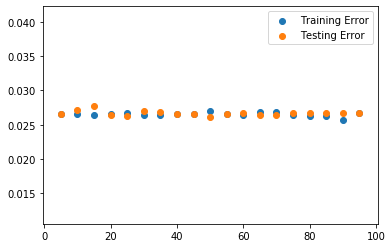

In [91]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

# Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data.

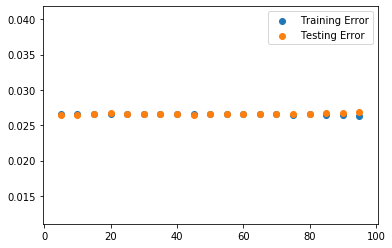

In [92]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [94]:
#Cross-Validation

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [96]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15515 3879 15515 3879


In [97]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [98]:
# Residuals and MSE 

In [99]:
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

0.026625374229797338

In [100]:
import math
math.sqrt(test_mse)

0.1631728354530782

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')

In [102]:
cv_5_results

array([-0.02730659, -0.02694821, -0.02618306, -0.02663087, -0.02641344])